In [1]:
import os

In [2]:
os.chdir('..')

<img src="flow_0.png">

In [3]:
import numpy as np
from flows.flows import Flows

Welcome to the Data Science Package. First create an object as follows:
For example, use the code below to import the flow 0:
flow = Flows(0)
You can define the `categorical_threshold` which is the maximum number of categories that a categorical feature should have before considering it as continuous numeric feature. The default value is 50
For example, use the code below to import the flow 0 with defining the categorical_threshold as 50
flow = Flows(flow_id=0, categorical_threshold=50)


In [4]:
flow = Flows(flow_id=0, categorical_threshold=10)

Please use the following function to read the data
dataframe_dict = flow.load_data(path: str, files_list: list)
For example: path = './data'
For example: files_list = ['train.csv','test.csv']
The output is a dictionary that contains dataframes e.g.  
dataframe_dict = {'train': train_dataframe,'test': test_dataframe}


In [5]:
path = os.path.join('data','flow_0')
files_list = ["train.csv","test.csv"]

In [6]:
dataframe_dict, columns_set = flow.load_data(path, files_list)

A summary of the data sets


,train,test
column type,,
categorical_integer,12,12
categorical_string,43,43
continuous,26,25
date,0,0
json,0,0
other,0,0
total amount,81,80


NOTE: numeric categorical columns that contains more than 10 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
The possible ids are {'Id'}
The possible possible_target are ['SalePrice']
The type of the problem that should be solved {'SalePrice': 'regression'}
If you have categorical features with string labels, Encode the categorical features by applying the following function:
dataframe_dict, columns_set = flow.encode_categorical_feature(dataframe_dict: dict)


In [7]:
 columns_set["train"].keys()

dict_keys(['categorical_string', 'categorical_integer', 'continuous', 'date', 'json', 'other'])

In [8]:
dataframe_dict, columns_set = flow.encode_categorical_feature(dataframe_dict)

The reference dataframe is: train
******************************
A summary of the data sets


,train,test
column type,,
categorical_integer,52,52
categorical_string,0,0
continuous,29,28
date,0,0
json,0,0
other,0,0
total amount,81,80


NOTE: numeric categorical columns that contains more than 10 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
If you have numeric features, it is a good idea to normalize numeric features. Use the following function for feature normalization :
dataframe_dict, columns_set = flow.scale_data (dataframe_dict: dict, ignore_columns: list)
For example: ignore_columns = ['id', 'target']


In [9]:
ignore_columns = ['Id', 'SalePrice']

In [10]:
dataframe_dict, columns_set = flow.scale_data(dataframe_dict, ignore_columns)

A summary of the data sets


,train,test
column type,,
categorical_integer,52,52
categorical_string,0,0
continuous,29,28
date,0,0
json,0,0
other,0,0
total amount,81,80


NOTE: numeric categorical columns that contains more than 10 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
Your features are ready to train the model: 
If you want to explore the data you can run one of the following functions: 
1 . flow.exploring_data(dataframe_dict: dict, key_i: str)
For example: flow.exploring_data(dataframe_dict, 'train')
2 . flow.comparing_statistics(dataframe_dict: dict)
For example: flow.comparing_statistics(dataframe_dict)




You can start training the model by applying the following function: 
model_index_list, save_models_dir, y_test = flow.training(parameters)
parameters = { 
 "data": {
 "train": {"features": train_dataframe, "target": train_target},
 "valid": {"features": valid_dataframe, "target": valid_target},
 "test": {"features": test_dataframe, "target": test_target},
 },
 "split": {
 "method": "split",  # "

Exploring column: Id
If there are missing values, they will be replaced by the term: -9999
The 5 most repeated values:
the value 1460     is found  1 times
the value 479      is found  1 times
the value 481      is found  1 times
the value 482      is found  1 times
the value 483      is found  1 times
The 5 least repeated values
the value 976     is found  1 times
the value 977     is found  1 times
the value 978     is found  1 times
the value 979     is found  1 times
the value 1       is found  1 times
The number of unique values is --> 1460
If you applied a normalization function, the x axis will show the normalized values.


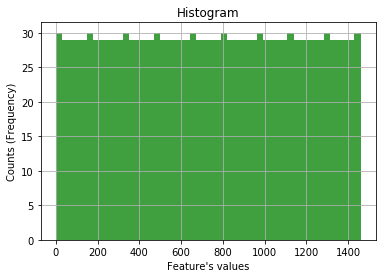

In [11]:
flow.exploring_data(dataframe_dict, "train")

Id: Comparing the statistical properties


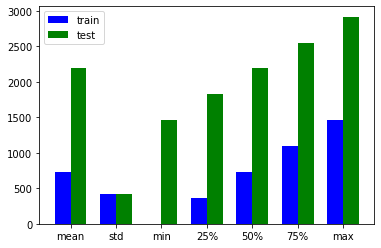

In [12]:
flow.comparing_statistics(dataframe_dict)

In [13]:
ignore_columns = ["Id", "SalePrice"]
columns = dataframe_dict["train"].columns
train_dataframe = dataframe_dict["train"][[x for x in columns_set["train"]["continuous"] if x not in ignore_columns]]
test_dataframe = dataframe_dict["test"][[x for x in columns_set["train"]["continuous"] if x not in ignore_columns]]
train_target = dataframe_dict["train"]["SalePrice"]

In [14]:
parameters = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # fold_nr:5 , "split_ratios": 0.3 # "split_ratios":(0.3,0.2)
        "stratify": True
    },
    "model": {"type": "Ridge linear regression",
              "hyperparameters": {"alpha": "optimize",  # alpha:optimize
                                  },
              },
    "metrics": ["r2_score"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [15]:
model_index_list, save_models_dir, y_test = flow.training(parameters)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
fold_nr. 1
the required metrics =  ['r2_score']
The quality of the model using the dataset kfold 1
dataset kfold 1:  R2: 72.7 %
fold_nr. 2
the required metrics =  ['r2_score']
The quality of the model using the dataset kfold 2
dataset kfold 2:  R2: 78.4 %
fold_nr. 3
the required metrics =  ['r2_score']
The quality of the model using the dataset kfold 3
dataset kfold 3:  R2: 57.4 %
fold_nr. 4
the required metrics =  ['r2_score']
The quality of the model using the dataset kfold 4
dataset kfold 4:  R2: 78.5 %
fold_nr. 5
the required metrics =  ['r2_score']
The quality of the model using the dataset kfold 5
dataset kfold 5:  R2: 70.0 %


,fold_1,fold_2,fold_3,fold_4,fold_5,mean
r2_score,72.7,78.4,57.4,78.5,70.0,71.4


the required metrics =  ['r2_score']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train:  R2: 75.0 %
the required metrics =  ['r2_score']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train:  R2: 75.2 %
the required metrics =  ['r2_score']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train:  R2: 74.3 %
the required metrics =  ['r2_score']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train:  R2: 75.2 %
the required metrics =  ['r2_score']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train:  R2: 75.4 %
train:  Mean R2: 75.02000000000001 %


,model_1,model_2,model_3,model_4,model_5,mean
r2_score (train),75.0,75.2,74.3,75.2,75.4,75.02


This is the end of the flow


In [16]:
parameters_lighgbm = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # fold_nr:5 , "split_ratios": 0.3 # "split_ratios":(0.3,0.2)
    },
    "model": {"type": "lightgbm",
              "hyperparameters": dict(objective='regression', metric='root_mean_squared_error', num_leaves=5,
                                      boost_from_average=True,
                                      learning_rate=0.05, bagging_fraction=0.99, feature_fraction=0.99, max_depth=-1,
                                      num_rounds=10000, min_data_in_leaf=10, boosting='dart')
              },
    "metrics": ["mean_squared_error"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [17]:
model_index_list, save_models_dir, y_test = flow.training(parameters_lighgbm)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
fold_nr. 1
the required metrics =  ['mean_squared_error']
The quality of the model using the dataset kfold 1
dataset kfold 1: Mean squared error: 981933101.3004
fold_nr. 2
the required metrics =  ['mean_squared_error']
The quality of the model using the dataset kfold 2
dataset kfold 2: Mean squared error: 864388341.2517
fold_nr. 3
the required metrics =  ['mean_squared_error']
The quality of the model using the dataset kfold 3
dataset kfold 3: Mean squared error: 854699861.802
fold_nr. 4
the required metrics =  ['mean_squared_error']
The quality of the model using the dataset kfold 4
dataset kfold 4: Mean squared error: 1271551761.765
fold_nr. 5
the required metrics =  ['mean_squared_error']
The quality of the model using the dataset kfold 5
dataset kfold 5: Mean squared error: 603764353.1094


,fold_1,fold_2,fold_3,fold_4,fold_5,mean
mean_squared_error,9.819331e+08,8.643883e+08,8.546999e+08,1.271552e+09,6.037644e+08,9.152675e+08


the required metrics =  ['mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 222525959.3491
the required metrics =  ['mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 198750624.6361
the required metrics =  ['mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 196643085.4525
the required metrics =  ['mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 280459214.0055
the required metrics =  ['mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 147494420.3877
train: Mean squared error linear: 209174660.76618


,model_1,model_2,model_3,model_4,model_5,mean
mean_squared_error (train),2.225260e+08,1.987506e+08,1.966431e+08,2.804592e+08,1.474944e+08,2.091747e+08


This is the end of the flow


In [18]:
parameters_xgboost = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # fold_nr:5 , "split_ratios": 0.3 # "split_ratios":(0.3,0.2)
    },
    "model": {"type": "xgboost",
              "hyperparameters": {'max_depth': 5, 'eta': 1, 'eval_metric': "rmse", "num_round": 100}
              },
    "metrics": ["r2_score", "mean_squared_error"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [19]:
model_index_list, save_models_dir, ytest = flow.training(parameters_xgboost)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
The objective is not defined. The default value is reg:squarederror. Error: 'objective'
fold_nr. 1
[0]	train-rmse:37538	test-rmse:54806.7
[1]	train-rmse:29193.1	test-rmse:51927.2
[2]	train-rmse:25792.4	test-rmse:51551.1
[3]	train-rmse:23502.8	test-rmse:48803.8
[4]	train-rmse:21469.5	test-rmse:48457.6
[5]	train-rmse:20102	test-rmse:47885.9
[6]	train-rmse:18593.8	test-rmse:48430
[7]	train-rmse:17937.3	test-rmse:48298.2
[8]	train-rmse:16745.5	test-rmse:47661.2
[9]	train-rmse:15971	test-rmse:47745.4
[10]	train-rmse:15221.4	test-rmse:48045.2
[11]	train-rmse:14588.7	test-rmse:48070.6
[12]	train-rmse:13181	test-rmse:47767.8
[13]	train-rmse:11838.5	test-rmse:47607.3
[14]	train-rmse:11198.7	test-rmse:47434.1
[15]	train-rmse:10630.5	test-rmse:47248.7
[16]	train-rmse:9975.48	test-rmse:46979.5
[17]	train-rmse:9654.72	test-rmse:46999.2
[18]	train-rmse:9179.41	test-rmse:47266.5
[19]	train-rmse:8794.44	test-rmse:47204.3
[

[88]	train-rmse:373.7	test-rmse:43973.7
[89]	train-rmse:362.074	test-rmse:43960.4
[90]	train-rmse:351.262	test-rmse:43967.7
[91]	train-rmse:338.41	test-rmse:43974.8
[92]	train-rmse:332.829	test-rmse:43972.5
[93]	train-rmse:326.159	test-rmse:43975.8
[94]	train-rmse:314.778	test-rmse:43975.8
[95]	train-rmse:306.283	test-rmse:43974.4
[96]	train-rmse:294.125	test-rmse:43974.3
[97]	train-rmse:286.577	test-rmse:43974.3
[98]	train-rmse:274.947	test-rmse:43966.2
[99]	train-rmse:263.481	test-rmse:43966.2
the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the dataset kfold 2
dataset kfold 2: Mean squared error: 1933022536.2573
dataset kfold 2:  R2: 68.1 %
fold_nr. 3
[0]	train-rmse:34958	test-rmse:43838.6
[1]	train-rmse:28872.2	test-rmse:42866.2
[2]	train-rmse:25962.1	test-rmse:41815.5
[3]	train-rmse:22619.6	test-rmse:42076
[4]	train-rmse:19401.9	test-rmse:42205.9
[5]	train-rmse:18719.8	test-rmse:41505.8
[6]	train-rmse:17740.7	test-rmse:40914
[7]	train-rmse:

[76]	train-rmse:579.926	test-rmse:54918.9
[77]	train-rmse:550.851	test-rmse:54926.3
[78]	train-rmse:522.002	test-rmse:54930.9
[79]	train-rmse:496.474	test-rmse:54933.5
[80]	train-rmse:478.607	test-rmse:54934.8
[81]	train-rmse:464.072	test-rmse:54931
[82]	train-rmse:451.681	test-rmse:54931.6
[83]	train-rmse:437.015	test-rmse:54931.9
[84]	train-rmse:424.855	test-rmse:54932.7
[85]	train-rmse:416.299	test-rmse:54929.4
[86]	train-rmse:396.178	test-rmse:54925.3
[87]	train-rmse:378.725	test-rmse:54929.4
[88]	train-rmse:362.349	test-rmse:54934.6
[89]	train-rmse:355.207	test-rmse:54935.8
[90]	train-rmse:338.43	test-rmse:54933.2
[91]	train-rmse:328.405	test-rmse:54933.1
[92]	train-rmse:321.102	test-rmse:54934.9
[93]	train-rmse:313.883	test-rmse:54937.8
[94]	train-rmse:301.328	test-rmse:54936.4
[95]	train-rmse:295.567	test-rmse:54936.6
[96]	train-rmse:290.219	test-rmse:54937.7
[97]	train-rmse:282.196	test-rmse:54939.5
[98]	train-rmse:279.792	test-rmse:54937.3
[99]	train-rmse:271.846	test-rmse:549

,fold_1,fold_2,fold_3,fold_4,fold_5,mean
mean_squared_error,2.267827e+09,1.933023e+09,1.684730e+09,3.018239e+09,1.561299e+09,2.093023e+09
r2_score,6.820000e+01,6.810000e+01,7.120000e+01,5.580000e+01,7.220000e+01,6.710000e+01


The objective is not defined. The default value is reg:squarederror. Error: 'objective'
This is xgboost exception. Error: 'DMatrix' object has no attribute 'to_numpy'
the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 453607309.3248
Evaluating the dataset: train:  R2: 92.8 %
the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 386660044.9266
Evaluating the dataset: train:  R2: 93.9 %
the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 336989317.6996
Evaluating the dataset: train:  R2: 94.7 %
the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating

,model_1,model_2,model_3,model_4,model_5,mean
mean_squared_error (train),4.536073e+08,3.866600e+08,3.369893e+08,6.037069e+08,3.122845e+08,4.186496e+08
r2_score (train),9.280000e+01,9.390000e+01,9.470000e+01,9.040000e+01,9.500000e+01,9.336000e+01


This is the end of the flow


In [20]:
parameters_sklearn = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "split",
        "split_ratios": 0.2,
        "stratify": False  # set to True only for classification tasks
    },
    "model": {
        "type": "sklearn.ensemble.RandomForestRegressor",
        "hyperparameters": {
            'params_grid':{
                'criterion': ["mse", "mae"],
                'max_depth': [5, 10, 15, 999],
                'min_samples_leaf': [4, 1],
                'max_depth': [4, 8, 12],
            },
            'params_fixed': {
                'min_samples_split': 10, 
                'random_state': 11
            },
            'params_cv': {
                'n_splits': 5, 
                'shuffle': True, 
                'random_state': 11
            },
            'objective': 'regression',  # 'classification'
            "grid_search_scoring": ['r2', 'neg_mean_squared_error']
        },
    },
    "metrics": ["r2_score", "mean_squared_error"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

model_index_list, save_models_dir, y_test = flow.training(parameters_sklearn)

the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the Evaluating sub-dataset nr.0
Evaluating sub-dataset nr.0: Mean squared error: 1252175910.1092
Evaluating sub-dataset nr.0:  R2: 83.7 %


,sub_dataset_0,mean
mean_squared_error,1.252176e+09,1.252176e+09
r2_score,8.370000e+01,8.370000e+01


the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 659833916.8396
Evaluating the dataset: train:  R2: 89.5 %
train: Mean squared error linear: 659833916.8396
train:  Mean R2: 89.5 %


,model_0,mean
mean_squared_error (train),6.598339e+08,6.598339e+08
r2_score (train),8.950000e+01,8.950000e+01


This is the end of the flow


In [21]:
parameters_sklearn = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "split",
        "split_ratios": 0.2,
        "stratify": False  # set to True only for classification tasks
    },
    "model": {
        "type": "sklearn.linear_model.ElasticNet",
        "hyperparameters": {
            'params_grid':{
                'alpha': np.logspace(-3,3,7),
                'l1_ratio': np.linspace(0, 0., num=4)+0.01
            },
            'params_fixed': {
                'normalize': True, 
                'max_iter': 2000,
                'random_state': 11
            },
            'params_cv': {
                'n_splits': 5, 
                'shuffle': True, 
                'random_state': 11
            },
            'objective': 'regression',  # 'classification'
            "grid_search_scoring": ['r2', 'neg_mean_squared_error']
        },
    },
    "metrics": ["r2_score", "mean_squared_error"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

model_index_list, save_models_dir, y_test = flow.training(parameters_sklearn)

the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the Evaluating sub-dataset nr.0
Evaluating sub-dataset nr.0: Mean squared error: 2102027185.3943
Evaluating sub-dataset nr.0:  R2: 72.6 %


,sub_dataset_0,mean
mean_squared_error,2.102027e+09,2.102027e+09
r2_score,7.260000e+01,7.260000e+01


the required metrics =  ['r2_score', 'mean_squared_error']
The quality of the model using the Evaluating the dataset: train
Evaluating the dataset: train: Mean squared error: 1857049932.5669
Evaluating the dataset: train:  R2: 70.6 %
train: Mean squared error linear: 1857049932.5669
train:  Mean R2: 70.6 %


,model_0,mean
mean_squared_error (train),1.857050e+09,1.857050e+09
r2_score (train),7.060000e+01,7.060000e+01


This is the end of the flow
